In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
customer_analysis = pd.read_csv('marketing_customer_analysis (1).csv')
customer_analysis.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data_types = customer_analysis.dtypes
print(data_types)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


In [4]:
customer_analysis.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [5]:
customer_analysis.drop('Customer', inplace=True, axis=1)
print(customer_analysis)

           State  Customer Lifetime Value Response  Coverage Education  \
0     Washington              2763.519279       No     Basic  Bachelor   
1        Arizona              6979.535903       No  Extended  Bachelor   
2         Nevada             12887.431650       No   Premium  Bachelor   
3     California              7645.861827       No     Basic  Bachelor   
4     Washington              2813.692575       No     Basic  Bachelor   
...          ...                      ...      ...       ...       ...   
9129  California             23405.987980       No     Basic  Bachelor   
9130  California              3096.511217      Yes  Extended   College   
9131  California              8163.890428       No  Extended  Bachelor   
9132  California              7524.442436       No  Extended   College   
9133  California              2611.836866       No  Extended   College   

     Effective To Date EmploymentStatus Gender  Income Location Code  ...  \
0              2/24/11         Emp

In [6]:
# change headers names to a more 'operational' format 
new_column_names = {
    'Customer': 'customer',
    'State': 'state',
    'Customer Lifetime Value': 'customer_lifetime_value',
    'Response': 'response',
    'Coverage': 'coverage',
    'Education': 'education',
    'Effective To Date': 'effective_to_date',
    'EmploymentStatus': 'employment_status',
    'Gender': 'gender',
    'Income': 'income',
    'Location Code': 'location_code',
    'Marital Status': 'marital_status',
    'Monthly Premium Auto': 'monthly_premium_auto',
    'Months Since Last Claim': 'months_since_last_claim',
    'Months Since Policy Inception': 'months_since_policy_inception',
    'Number of Open Complaints': 'number_of_open_complaints',
    'Number of Policies': 'number_of_policies',
    'Policy Type': 'policy_type',
    'Policy': 'policy',
    'Renew Offer Type': 'renew_offer_type',
    'Sales Channel': 'sales_channel',
    'Total Claim Amount': 'total_claim_amount',
    'Vehicle Class': 'vehicle_class',
    'Vehicle Size': 'vehicle_size'
}

# rename columns 
customer_analysis_2 = customer_analysis.rename(columns=new_column_names)
print(customer_analysis_2)

           state  customer_lifetime_value response  coverage education  \
0     Washington              2763.519279       No     Basic  Bachelor   
1        Arizona              6979.535903       No  Extended  Bachelor   
2         Nevada             12887.431650       No   Premium  Bachelor   
3     California              7645.861827       No     Basic  Bachelor   
4     Washington              2813.692575       No     Basic  Bachelor   
...          ...                      ...      ...       ...       ...   
9129  California             23405.987980       No     Basic  Bachelor   
9130  California              3096.511217      Yes  Extended   College   
9131  California              8163.890428       No  Extended  Bachelor   
9132  California              7524.442436       No  Extended   College   
9133  California              2611.836866       No  Extended   College   

     effective_to_date employment_status gender  income location_code  ...  \
0              2/24/11          E

In [7]:
print(customer_analysis_2.columns)

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [8]:
# Check for NaN values in the DataFrame
nan_values = customer_analysis_2.isna().sum()

# Display the count of NaN values for each column
print("NaN Values:")
print(nan_values)

NaN Values:
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [9]:
# we see that there are no "nan values"

In [10]:
num = customer_analysis_2.select_dtypes(include=['float64', 'int64'])
num 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
cat = customer_analysis_2.select_dtypes(include=['object'])
cat 

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
# Find the summary statistics for numerical variables
summary_stats = customer_analysis_2.describe()

# Display the summary statistics
print(summary_stats)

       customer_lifetime_value        income  monthly_premium_auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

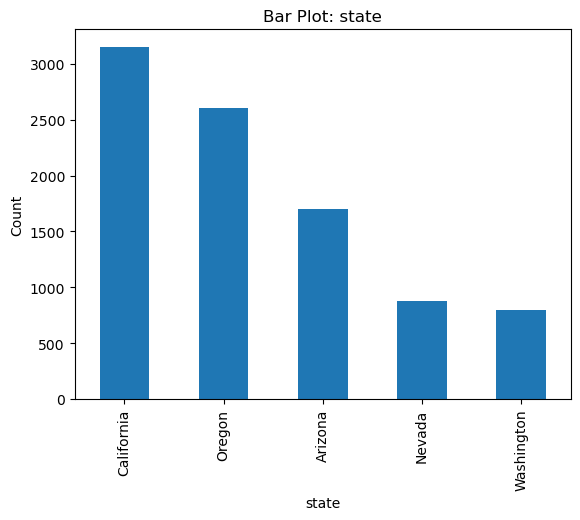

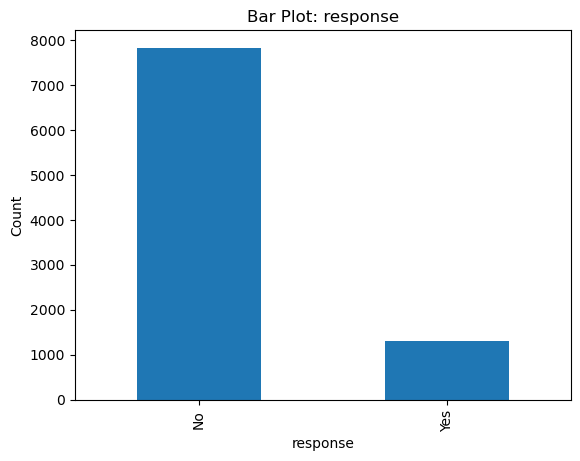

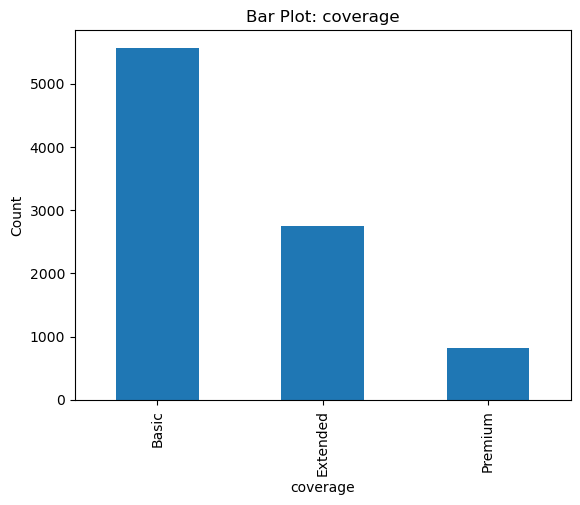

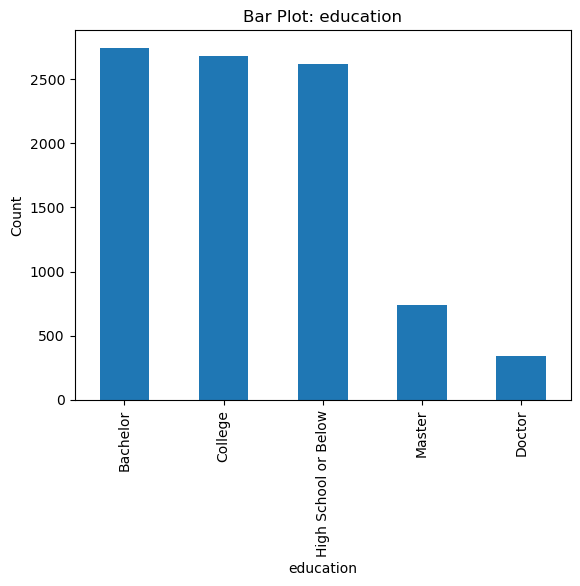

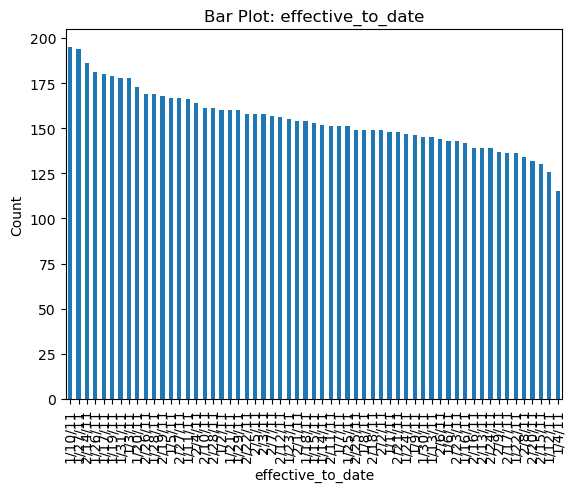

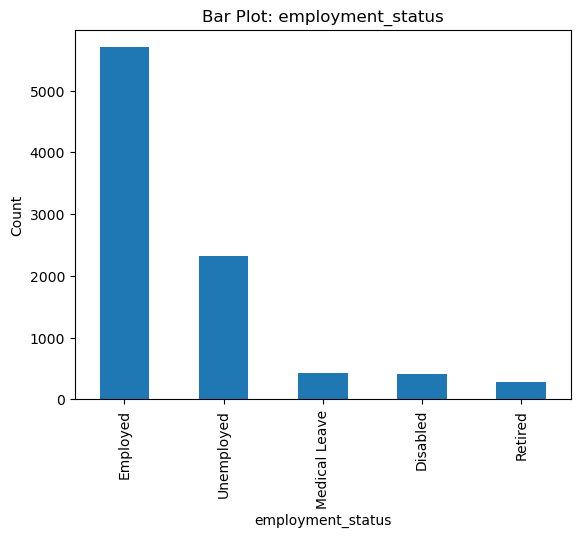

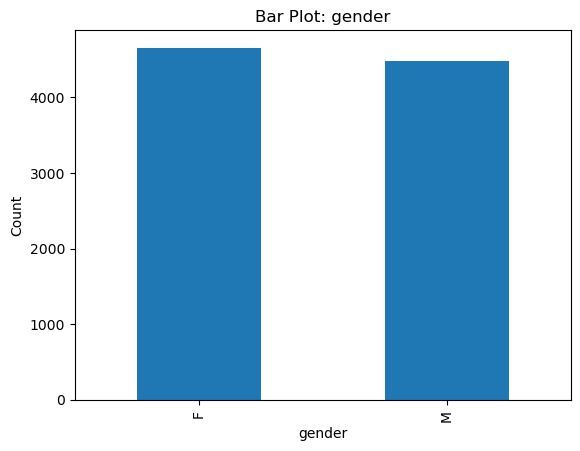

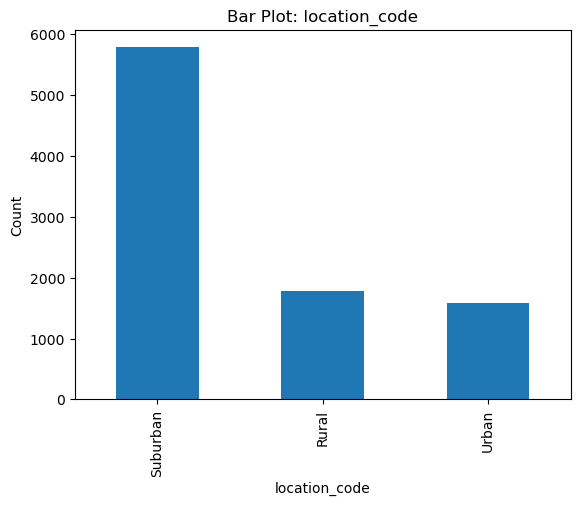

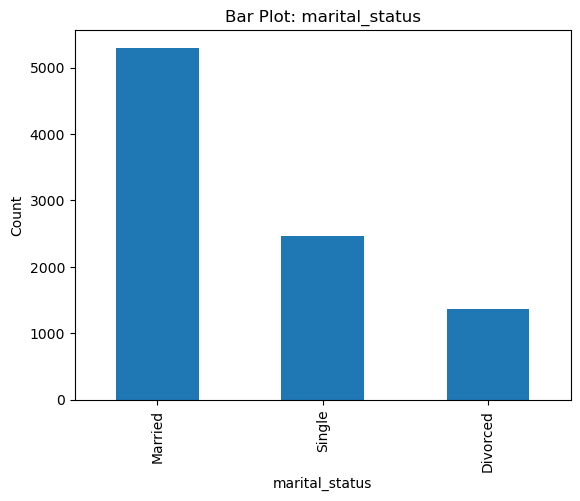

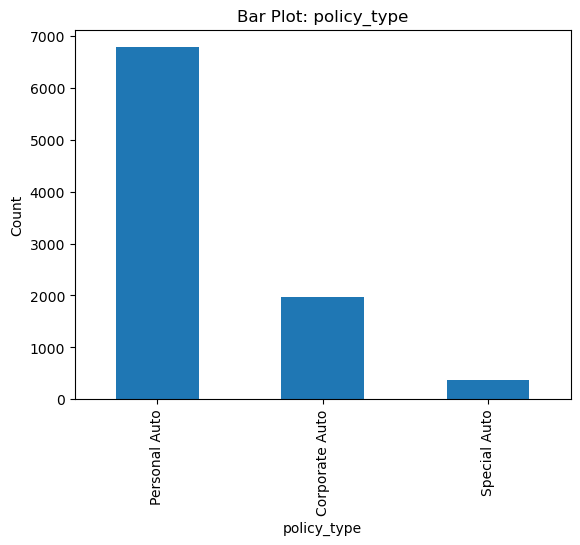

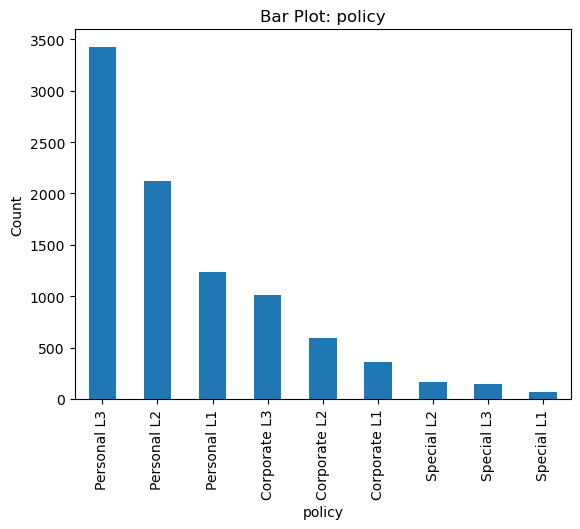

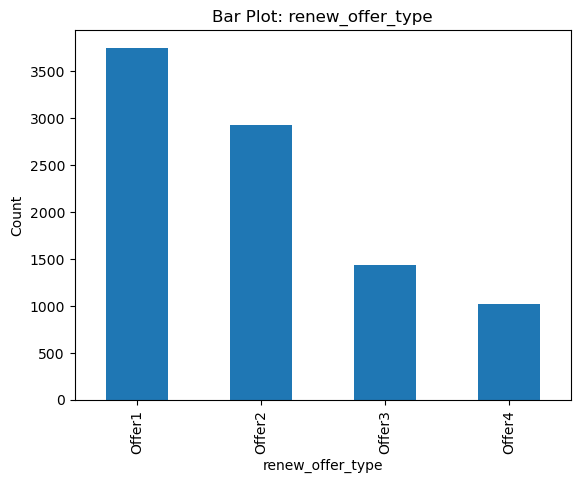

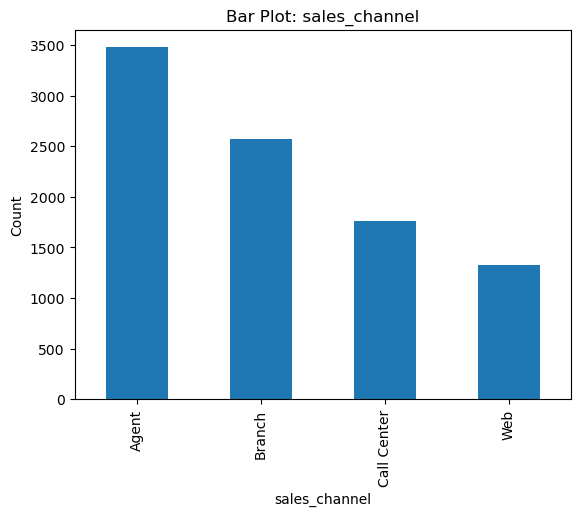

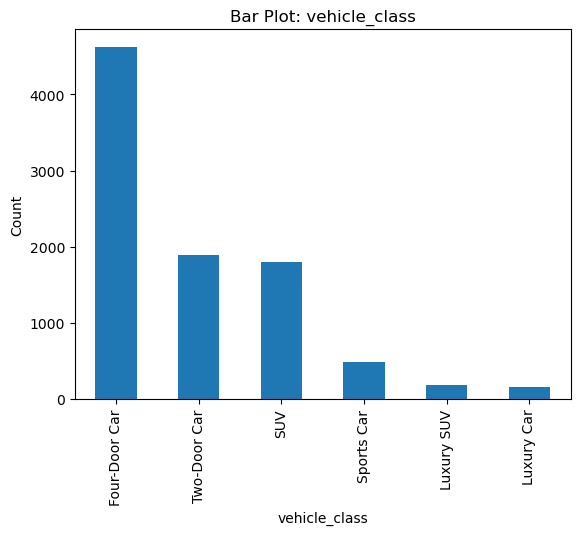

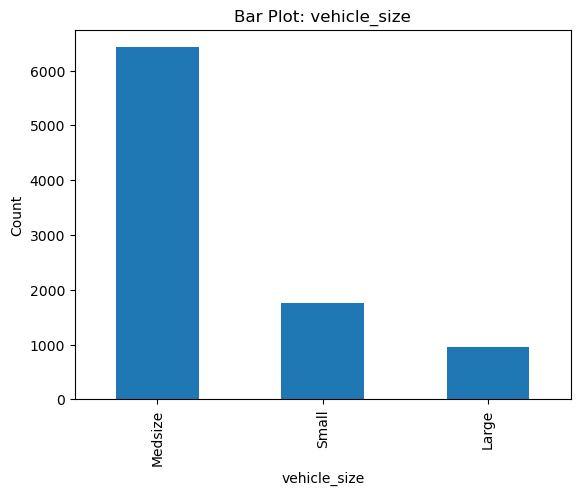

In [13]:
for column in cat.columns:
    category_counts = cat[column].value_counts()
    category_counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Bar Plot: ' + column)
    plt.show()

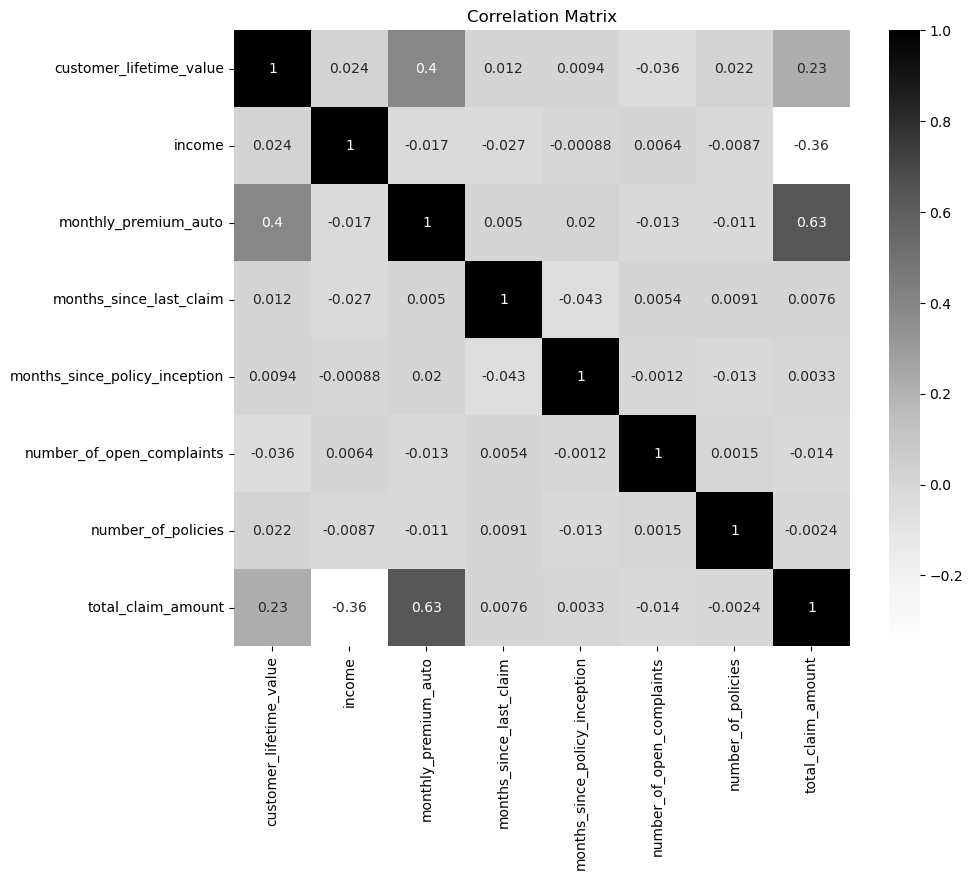

In [19]:
correlation_matrix = customer_analysis_2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Greys", square=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# get numerical variables outliers 

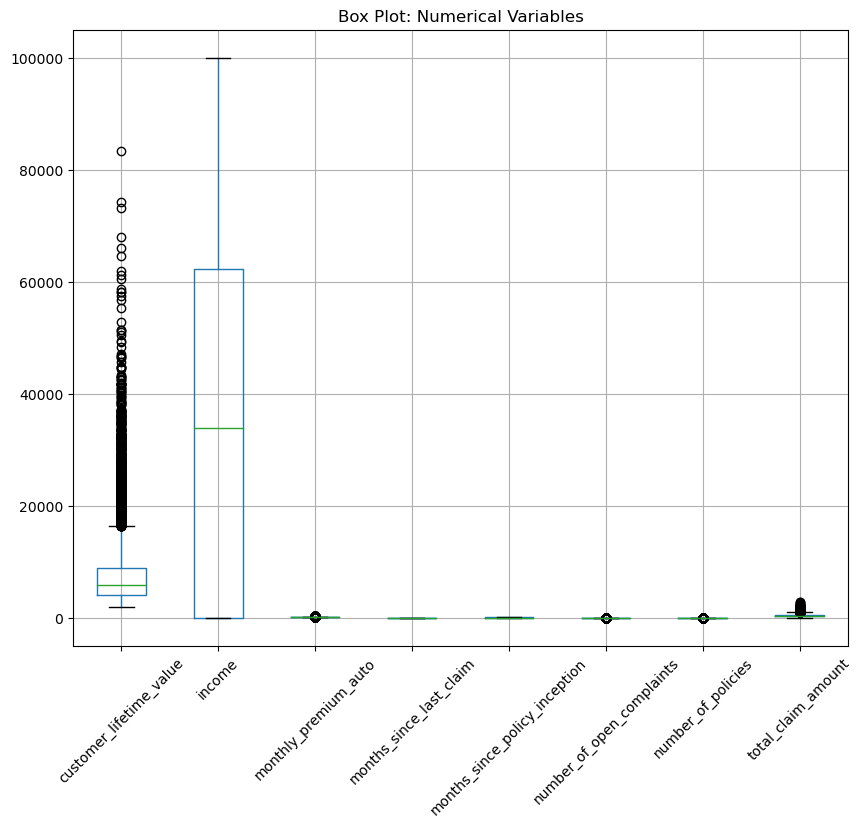

In [21]:
plt.figure(figsize=(10, 8))
num.boxplot()
plt.title('Box Plot: Numerical Variables')
plt.xticks(rotation=45)
plt.show()

we can get a clear outliers' representation regarding 'customer lifetime value' and 'income' however, for the rest of numerical variables, we don't get such a clear image of the outliers distribution, it would be necessary to analyse all of them individually, which is the next step that we perform: 

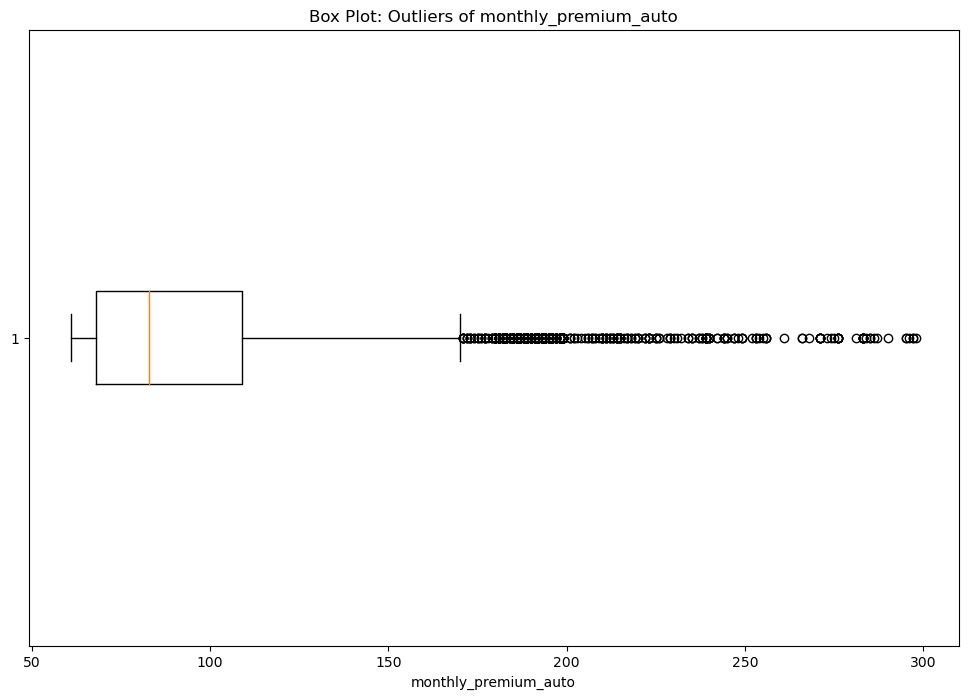

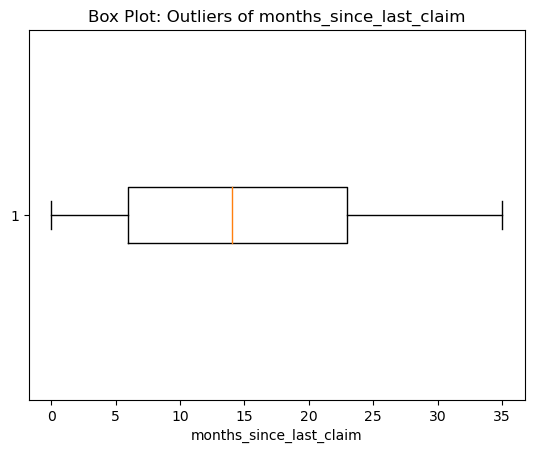

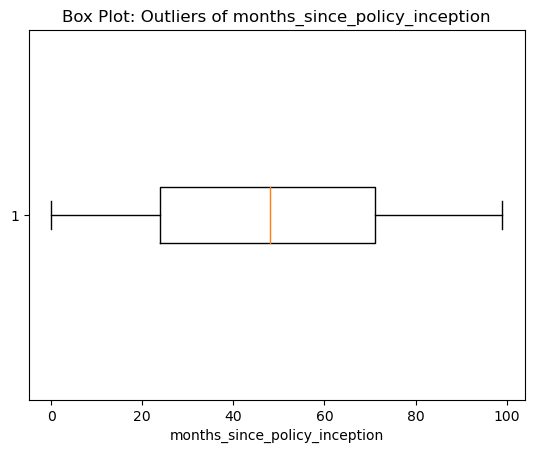

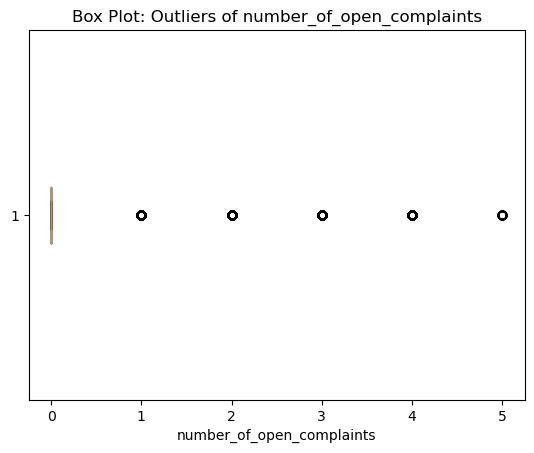

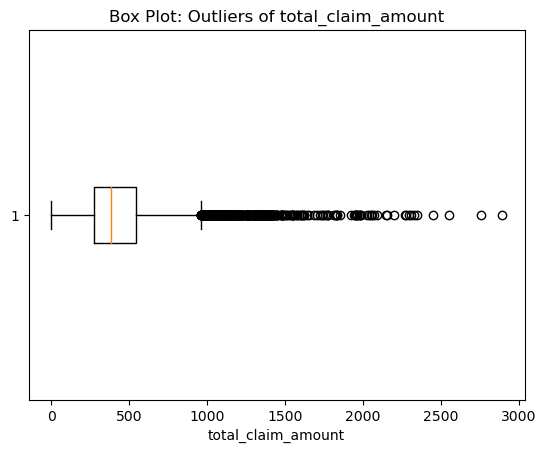

In [32]:
# Select the specified numerical variables
nums_2 = ['monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'total_claim_amount']

# Plot box plots for each variable individually
plt.figure(figsize=(12, 8))

for var in nums_2:
    plt.boxplot(customer_analysis_2[var], vert=False)
    plt.title('Box Plot: Outliers of ' + var)
    plt.xlabel(var)
    plt.show()

In [34]:
# Apply min-max to normalise 

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num)
normalized_df = pd.DataFrame(normalized_data, columns=num.columns)

# Output the data that we have normalised 

print(normalized_df)

      customer_lifetime_value    income  monthly_premium_auto  \
0                    0.010629  0.562847              0.033755   
1                    0.062406  0.000000              0.139241   
2                    0.134960  0.487763              0.198312   
3                    0.070589  0.000000              0.189873   
4                    0.011245  0.438443              0.050633   
...                       ...       ...                   ...   
9129                 0.264137  0.719547              0.050633   
9130                 0.014719  0.216081              0.075949   
9131                 0.076951  0.000000              0.101266   
9132                 0.069098  0.219452              0.147679   
9133                 0.008766  0.000000              0.067511   

      months_since_last_claim  months_since_policy_inception  \
0                    0.914286                       0.050505   
1                    0.371429                       0.424242   
2                    0.5142

In [35]:
# Select the categorical variables to encode
cat = customer_analysis_2.select_dtypes(include=['object'])

# Perform one-hot encoding
encoded_data = pd.get_dummies(cat)

# Combine the encoded data with the original numerical variables
encoded_df = pd.concat([customer_analysis_2.select_dtypes(include=['float64', 'int64']), encoded_data], axis=1)

# Display the encoded data
print(encoded_df)

      customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                      

In [ ]:
# apply train-test 

In [39]:
# Separate the features (predictors, X) and the target variable (y)
X = customer_analysis_2.drop('customer_lifetime_value', axis=1)
y = customer_analysis_2['customer_lifetime_value']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (7307, 22) (7307,)
Test set shape: (1827, 22) (1827,)
